In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input , Dense
import keras

In [ ]:
data = load_breast_cancer()
data_df = pd.DataFrame(data.data , columns=data.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(data_df.shape)

(569, 30)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(data.data,data.target,test_size=0.33)
N , D =x_train.shape
print(x_train.shape)
print('N',N)
print('D',D)

(381, 30)
N 381
D 30


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential([keras.layers.Input(shape=(D,)),
                    keras.layers.Dense(1 , activation = 'sigmoid')])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
bc = model.fit(x_train , y_train , validation_data=(x_test , y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2681 - accuracy: 0.9003 - val_loss: 0.2665 - val_accuracy: 0.9149
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.9134 - val_loss: 0.2524 - val_accuracy: 0.9149
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9186 - val_loss: 0.2396 - val_accuracy: 0.9202
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9213 - val_loss: 0.2280 - val_accuracy: 0.9202
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9239 - val_loss: 0.2181 - val_accuracy: 0.9309
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9291 - val_loss: 0.2092 - val_accuracy: 0.9309
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1968 - accuracy: 0.9370 - val_loss: 0.2009 - val_accuracy: 0.9362
Epoch 8/100


In [ ]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9734


[0.07534568011760712, 0.9734042286872864]

In [ ]:
history = bc.history

In [ ]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

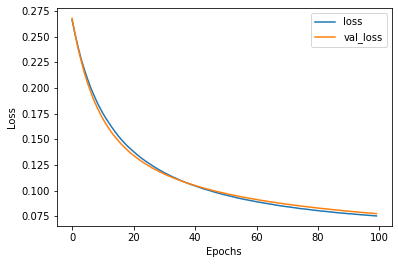

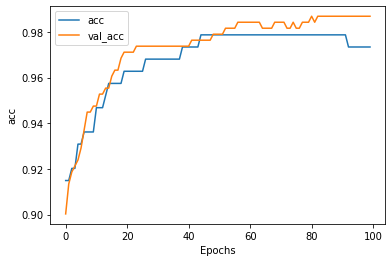

In [ ]:
losses = history['loss']
val_losses = history['val_loss']
accuracies = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(val_losses)
plt.plot(losses)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.plot(val_acc)
plt.plot(accuracies)
plt.legend(['acc','val_acc'])
plt.show()

In [ ]:
for i in range(len(x_test)):
  pred = np.round(model.predict(x_test)[i][0])
  pred = int(pred)
  real=y_test[i]
  print('for sample {}: real is {} and prediction is {}.'.format(i,real,pred))

for sample 0: real is 1 and prediction is 1.
for sample 1: real is 0 and prediction is 0.
for sample 2: real is 0 and prediction is 0.
for sample 3: real is 1 and prediction is 1.
for sample 4: real is 1 and prediction is 1.
for sample 5: real is 1 and prediction is 1.
for sample 6: real is 0 and prediction is 0.
for sample 7: real is 1 and prediction is 1.
for sample 8: real is 1 and prediction is 1.
for sample 9: real is 1 and prediction is 1.
for sample 10: real is 0 and prediction is 0.
for sample 11: real is 0 and prediction is 0.
for sample 12: real is 1 and prediction is 1.
for sample 13: real is 1 and prediction is 1.
for sample 14: real is 1 and prediction is 1.
for sample 15: real is 1 and prediction is 1.
for sample 16: real is 1 and prediction is 1.
for sample 17: real is 1 and prediction is 1.
for sample 18: real is 1 and prediction is 1.
for sample 19: real is 1 and prediction is 1.
for sample 20: real is 0 and prediction is 0.
for sample 21: real is 1 and prediction is 1